<a href="https://colab.research.google.com/github/proflynch/Tekbac/blob/master/MNIST_Hidden_Layers_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Hidden Layers Keras

11493376/11490434 [==============================] - 0s 0us/step
Dimensions of first image= (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93 

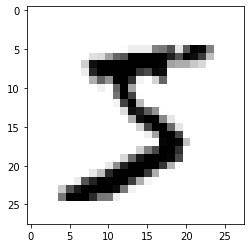

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist # Digits 0-9, 28x28= pixels
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Dimensions of first image=',x_train[0].shape)
print(x_train[0])
#plt.imshow(x_train[0])                       # Plots the colour image.
plt.imshow(x_train[0], cmap = plt.cm.binary)   # Plots a grey scale image.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

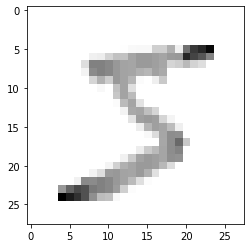

In [2]:
# Normalize the data.
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())    # The input layer.
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # The 1st hidden layer with RELU activation. 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # The 2nd hidden layer with RELU activation.
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # The number of classifications with softmax activation.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2648 - acc: 0.9234
Epoch 2/3
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1104 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0772 - acc: 0.9754


In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0948 - acc: 0.9711
0.09477952112741768 0.9711


In [5]:
predictions = model.predict([x_test])
print(predictions)

[[1.3819676e-08 4.3422652e-08 3.2392789e-05 ... 9.9994588e-01
  1.2378690e-08 3.7395543e-07]
 [3.3608777e-10 5.7252440e-05 9.9994218e-01 ... 3.0975739e-10
  3.7137100e-09 2.2043454e-13]
 [2.1515793e-07 9.9849319e-01 5.0803672e-05 ... 2.7903251e-04
  8.5117028e-04 1.8765586e-05]
 ...
 [4.2836479e-08 3.2776129e-06 2.7012434e-06 ... 8.7217084e-04
  3.4830632e-06 5.5257471e-05]
 [2.8567435e-06 5.5903738e-06 3.0347746e-07 ... 6.4796677e-06
  2.7489902e-03 9.3694382e-08]
 [2.4324629e-07 1.6236753e-07 4.1335639e-08 ... 3.2109122e-09
  2.8213307e-08 2.0509690e-10]]


9


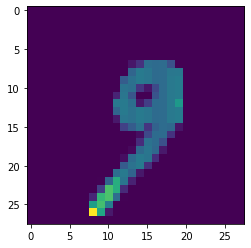

In [6]:
import numpy as np
index = 1000
print(np.argmax(predictions[index]))
plt.imshow(x_test[index])
plt.show()